In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
# for non-linear equations, do while loops until the first 5 exact digits is accurate
# error is usually 1.0E-6

In [4]:
def euler(f,x,y0):
    n = np.shape(x)[0]
    ns = np.shape(y0)[0]
    y = np.zeros((n,ns))
    y[0,:] = y0
    h = x[1] - x[0]
    for i in range(n-1):
        y[i+1,:] = y[i,:] + h*f(x[i], y[i,:])
    return y

In [5]:
def problem(x, y):
    z1 = y[0]
    z2 = y[1]
    dz1 = z2
    dz2 = -(np.exp(-z1))
    return np.array([dz1, dz2], dtype=float)

In [6]:
x = np.linspace(0, 1, 11)
y0 = np.array([0, 1.0])
# first shooting
theta1 = 1.0
y = euler(problem, x, [1.0, theta1])
y1 = y[-1,0]
yfirst = y[:,0]
print(y)

# second shooting
theta2 = 2.0
y = euler(problem, x, [1.0, theta2])
y2 = y[-1,0]
ysecond = y[:,0]
print(y)

# third shooting, should be precise at 0.5
y3 = 0.5
theta3 = theta1 + (y3 -y1) / (y2-y1) * (theta2 - theta1)
y = euler(problem, x, [1.0, theta3])
y3 = y[-1,0]
ythird = y[:,0]
print(y)
print(y3)

[[1.         1.        ]
 [1.1        0.96321206]
 [1.19632121 0.92992495]
 [1.2893137  0.89969452]
 [1.37928315 0.87214854]
 [1.46649801 0.84697265]
 [1.55119527 0.82389944]
 [1.63358521 0.80269999]
 [1.71385521 0.78317716]
 [1.79217293 0.76516017]
 [1.86868895 0.74850039]]
[[1.         2.        ]
 [1.2        1.96321206]
 [1.39632121 1.93309263]
 [1.58963047 1.90834205]
 [1.78046467 1.88794196]
 [1.96925887 1.87108597]
 [2.15636747 1.85712995]
 [2.34208046 1.84555547]
 [2.52663601 1.83594273]
 [2.71023028 1.82794998]
 [2.89302528 1.82129783]]
[[ 1.         -0.33617143]
 [ 0.96638286 -0.37295938]
 [ 0.92908692 -0.41100505]
 [ 0.88798641 -0.45049646]
 [ 0.84293677 -0.49164481]
 [ 0.79377229 -0.53468927]
 [ 0.74030336 -0.57990286]
 [ 0.68231307 -0.62759978]
 [ 0.6195531  -0.67814443]
 [ 0.55173865 -0.73196293]
 [ 0.47854236 -0.78955768]]
0.478542359012952


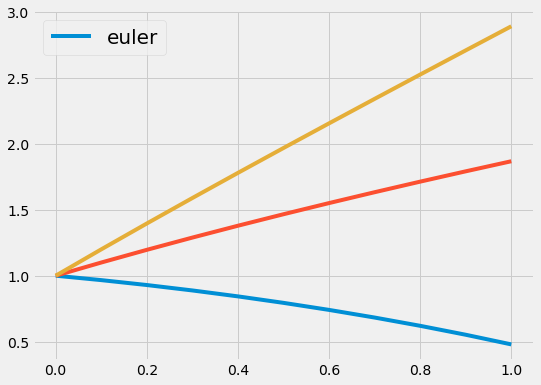

In [7]:
fig = plt.figure(1, figsize=(8,6)); plt.clf()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y[:,0], label = "euler")
ax.plot(x, yfirst, x, ysecond)
ax.legend(prop = {"size" : 20}) 

In [8]:
# variations on the boundary value problems where varying points are made known/unknown
def problem2(x, y):
    z1 = y[0]
    z2 = y[1]
    dz1 = z2
    dz2 = z1**2 + x*z1
    return np.array([dz1, dz2], dtype=float)

In [9]:
def interpolate(theta1, theta2, y1,y2,y3):
    theta3 = theta1 + (y3-y1)/(y2-y1)*(theta2-theta1)
    return theta3